In [1]:
from util import *
import seaborn as ses
import matplotlib.pyplot as plt

In [2]:
shop_info = load_shop_info()
print shop_info.shape
train_info = load_train()
testA_info = load_testA()

(8477, 6)


In [20]:
print list(shop_info.columns)
print "shop size:", len(shop_info.shop_id.unique())
print "mall size:", len(shop_info.mall_id.unique())
print "category size:", len(shop_info.category_id.unique())
print "longitude size:", len(shop_info.longitude.unique())
print "latitude size:", len(shop_info.latitude.unique())
print "price size:", len(shop_info.price.unique())
print 
print "shop_info nan size: "
print pd.isnull(shop_info).sum()

['shop_id', 'category_id', 'longitude', 'latitude', 'price', 'mall_id']
shop size: 8477
mall size: 97
category size: 67
longitude size: 6991
latitude size: 6995
price size: 54

shop_info nan size: 
shop_id        0
category_id    0
longitude      0
latitude       0
price          0
mall_id        0
dtype: int64


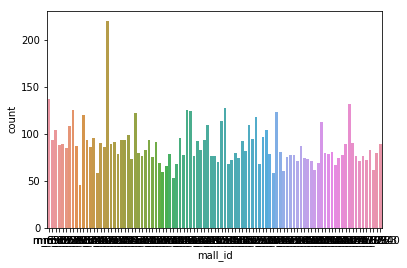

In [3]:
ses.countplot("mall_id",data=shop_info)
plt.show()

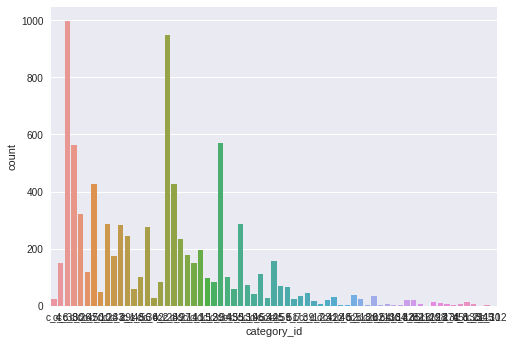

In [22]:
ses.countplot("category_id",data=shop_info)
plt.show()

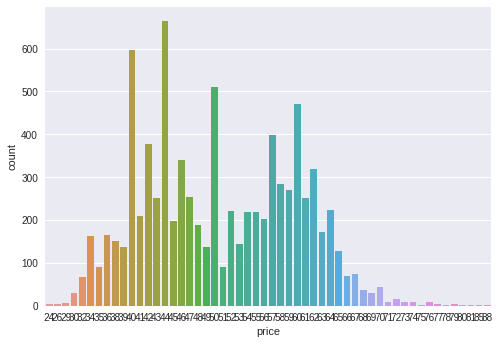

In [24]:
ses.countplot("price",data=shop_info)
plt.show()

In [33]:
def print_info(data,name):
    print name
    print name +" shape:",data.shape
    print name +" columns:", data.columns
    print "user size:",len(data.user_id.unique())
    if name is "train":
        print "user go shop size:",len(data.shop_id.unique()) #和总商店数一样
    else:
        print "user go mall size:", len(data.mall_id.unique())
    print "user go lon size:",len(data.longitude.unique())
    print "user go lat size:",len(data.latitude.unique())
    print "user wifi size:",len(data.wifi_infos.unique())
    print 
    print name + " null size:"
    print pd.isnull(data).sum()

In [34]:
print_info(train_info,"train")

train
train shape: (1138015, 6)
train columns: Index([u'user_id', u'shop_id', u'time_stamp', u'longitude', u'latitude',
       u'wifi_infos'],
      dtype='object')
user size: 714608
user go shop size: 8477
user go lon size: 189749
user go lat size: 170283
user wifi size: 1137647

train null size:
user_id       0
shop_id       0
time_stamp    0
longitude     0
latitude      0
wifi_infos    0
dtype: int64


In [35]:
print_info(testA_info,"testA")

testA
testA shape: (483931, 7)
testA columns: Index([u'row_id', u'user_id', u'mall_id', u'time_stamp', u'longitude',
       u'latitude', u'wifi_infos'],
      dtype='object')
user size: 338642
user go mall size: 97
user go lon size: 138936
user go lat size: 128063
user wifi size: 483785

testA null size:
row_id        0
user_id       0
mall_id       0
time_stamp    0
longitude     0
latitude      0
wifi_infos    0
dtype: int64


In [6]:
intersect_user_id = np.intersect1d(train_info.user_id.unique(),testA_info.user_id.unique())
union_user_id = np.union1d(train_info.user_id.unique(),testA_info.user_id.unique())
print "train and test intersect userid size :", len(intersect_user_id)
print "train and test union userid size :", len(union_user_id)

train and test intersect userid size : 91335
train and test union userid size : 961915


In [5]:
shop_info.columns

Index([u'shop_id', u'category_id', u'shop_longitude', u'shop_latitude',
       u'price', u'mall_id'],
      dtype='object')

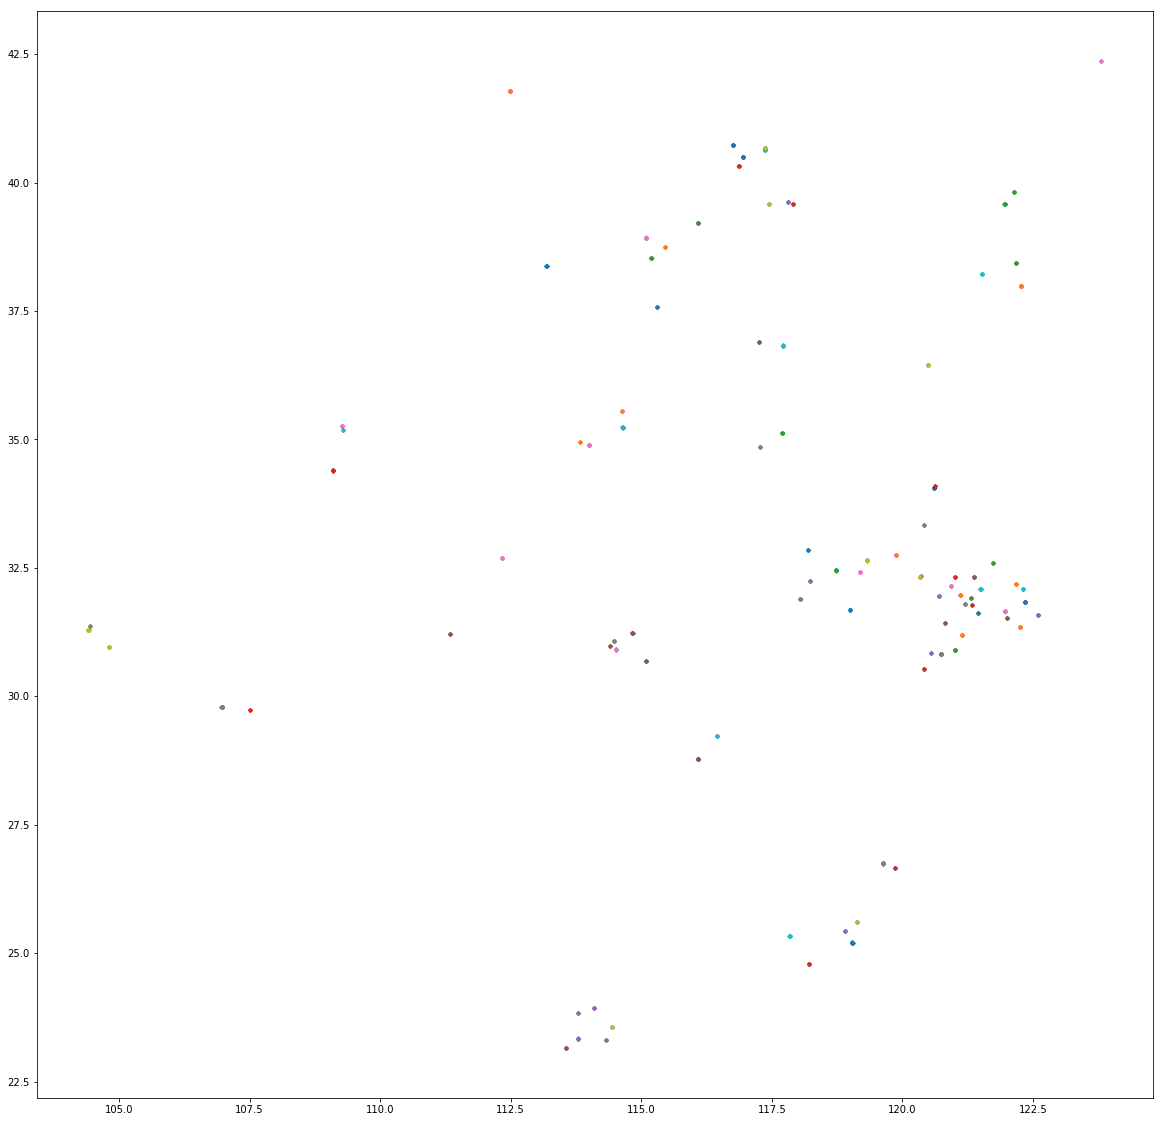

In [20]:
# shop 经纬度图
mall_ids = shop_info.mall_id.unique()
plt.figure(figsize=(20,20))
for _mall_id in mall_ids:
    _info = shop_info[shop_info.mall_id==_mall_id]
    plt.scatter(x=_info.shop_longitude,y =_info.shop_latitude,s=5)
# ses.jointplot(x="shop_longitude",y="shop_latitude",data=shop_info)
plt.show()

In [31]:
train_info = pd.merge(train_info, shop_info, on="shop_id", how="left")
train_info.columns

Index([u'user_id', u'shop_id', u'time_stamp', u'longitude', u'latitude',
       u'wifi_infos', u'category_id', u'shop_longitude', u'shop_latitude',
       u'price', u'mall_id'],
      dtype='object')

In [32]:
# m_2224 220家shop
m_2224 = "m_2224"
part_shop_info = shop_info[shop_info.mall_id==m_2224]
part_train = train_info[train_info.mall_id==m_2224]
part_test = testA_info[testA_info.mall_id==m_2224]

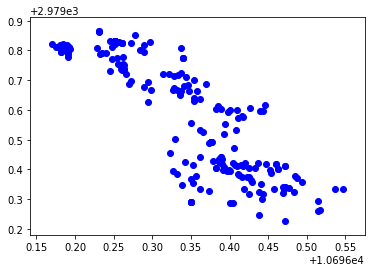

In [63]:
plt.scatter(x=part_shop_info.shop_longitude * 100,y=part_shop_info.shop_latitude * 100,c="b")
plt.show()
lon_max = part_shop_info.shop_longitude.max()
lon_min = part_shop_info.shop_longitude.min()
lat_max = part_shop_info.shop_latitude.max()
lat_min = part_shop_info.shop_latitude.min()

In [48]:
print "lat unique shape", part_shop_info.shop_latitude.unique().shape
print "lon unique shape", part_shop_info.shop_longitude.unique().shape
print "lat and lon unique shape", (part_shop_info.shop_latitude.astype(str) + part_shop_info.shop_longitude.astype(str)).unique().shape

lat unique shape (173,)
lon unique shape (172,)
lat lon unique shape (176,)


all shape (15493, 11)
reasonal shape (14083, 11)


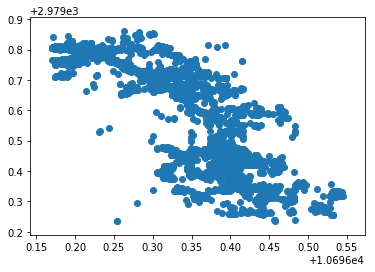

lat unique shape (3576,)
lon unique shape (2607,)
lat and lon unique shape (12139,)


In [69]:
useful_lonlats = part_train[(part_train.longitude > lon_min) & (part_train.longitude < lon_max) * (part_train.latitude > lat_min) & (part_train.latitude < lat_max)]
part_train_lons = useful_lonlats.longitude
part_train_lats = useful_lonlats.latitude
print "all shape", part_train.shape
print "reasonal shape", useful_lonlats.shape
plt.scatter(x=part_train_lons * 100,y=part_train_lats * 100)
plt.show()
print "lat unique shape", part_train_lats.unique().shape
print "lon unique shape", part_train_lons.unique().shape
print "lat and lon unique shape", (part_train_lons.astype(str) + part_train_lats.astype(str)).unique().shape

In [73]:
no_useful_lonlats = part_train[~np.in1d(part_train.user_id,useful_lonlats.user_id)]
useful_lonlats = preprocess_wifi(useful_lonlats)
no_useful_lonlats = preprocess_wifi(no_useful_lonlats)
no_useful_lonlats

,user_id,shop_id,time_stamp,longitude,latitude,wifi_infos,category_id,shop_longitude,shop_latitude,price,mall_id,wifi_size,use_wifi_size,no_use_wifi_size,use_wifi_freq,no_use_wifi_freq
1993,u_326336,s_272961,2017-08-23 20:00,106.961669,29.798034,b_32383027|-75|false;b_27155179|-55|false;b_15...,c_34,106.961855,29.798189,40,m_2224,10,0,10,0.000000,1.000000
4460,u_726803,s_1467479,2017-08-08 20:20,106.961655,29.798031,b_32127059|-72|false;b_7310638|-71|false;b_401...,c_25,106.961849,29.798187,45,m_2224,10,0,10,0.000000,1.000000
11901,u_1990392,s_3695706,2017-08-03 18:50,106.967104,29.793604,b_7624726|-84|false;b_28069649|-43|false;b_324...,c_15,106.963758,29.794905,59,m_2224,10,0,10,0.000000,1.000000
12813,u_2141608,s_3695706,2017-08-04 20:00,106.967111,29.793624,b_28069649|-37|false;b_47243040|-86|false;b_28...,c_15,106.963758,29.794905,59,m_2224,10,0,10,0.000000,1.000000
12868,u_2149236,s_272961,2017-08-06 18:10,106.961690,29.798036,b_47586460|-66|false;b_18426607|-75|false;b_10...,c_34,106.961855,29.798189,40,m_2224,10,0,10,0.000000,1.000000
13700,u_2313003,s_49986,2017-08-18 15:10,106.961675,29.798035,b_47586460|-51|false;b_40192078|-62|false;b_27...,c_34,106.962309,29.798641,36,m_2224,10,0,10,0.000000,1.000000
14093,u_2388826,s_272961,2017-08-04 15:40,106.961705,29.798040,b_40192078|-70|false;b_12558033|-67|false;b_18...,c_34,106.961855,29.798189,40,m_2224,10,0,10,0.000000,1.000000
16040,u_2760258,s_636769,2017-08-01 19:20,106.961626,29.798051,b_56323114|-55|false;b_1192737|-61|false;b_563...,c_39,106.961818,29.797933,60,m_2224,10,1,9,0.100000,0.900000
16615,u_2880806,s_14751,2017-08-25 11:30,106.961525,29.797992,b_28261825|-71|false;b_12475396|-49|false;b_73...,c_28,106.961858,29.798143,60,m_2224,10,0,10,0.000000,1.000000
20305,u_3589896,s_59723,2017-08-22 14:50,106.961682,29.798067,b_34350043|-74|false;b_39749748|-63|false;b_21...,c_36,106.961895,29.797987,62,m_2224,10,0,10,0.000000,1.000000


In [188]:
train,test = preprocess()

In [84]:
    data = part_test
    def wifi_info_preprocess(x):
        all_wifis = x.split(";")
        wifi_size = len(all_wifis)
        no_use_wifis = []
        use_wifis = []
        for _wifi in all_wifis:
            _infos = _wifi.split("|")
            _wifi_name = _infos[0]
            _wifi_signal = int(_infos[1])
            _wifi_use = _infos[2]
            if _wifi_use == "true":
                use_wifis.append((_wifi_name, _wifi_signal))
            elif _wifi_use == "false":
                no_use_wifis.append((_wifi_name, _wifi_signal))
        return (wifi_size, use_wifis, no_use_wifis)

    wifi_infos = data.wifi_infos.map(lambda x: wifi_info_preprocess(x))                

    wifi_infos = data.wifi_infos.map(lambda x: wifi_info_preprocess(x))
    data.loc[:, "basic_wifi_info"] = wifi_infos

In [162]:
_part_train = part_train
_part_test = part_test

In [163]:
        all_wifis = []

        def get_all_wifi(x, all_wifis):
            for _x in x[1]:
                all_wifis.append(_x[0])
            for _x in x[2]:
                all_wifis.append(_x[0])

        _part_train.basic_wifi_info.map(lambda x: get_all_wifi(x, all_wifis))
        _part_test.basic_wifi_info.map(lambda x: get_all_wifi(x, all_wifis))
        c = Counter(all_wifis)
        sorted_wifi = sorted(c.items(), key=lambda x: -x[1])
        sorted_wifi = sorted_wifi[:shop_size]

        d = {}  # 将wifi按rank放入dict
        for i, w in enumerate(sorted_wifi):
            d[w[0]] = i

In [181]:
x = _part_train.basic_wifi_info.iloc[0]
use_wifi = sorted(x[2],key=lambda x:-x[1])
for _i,name in enumerate(use_wifi):
    if name[0] in d:
        

0 b_20532774
1 b_8630180
2 b_752517
3 b_8630178
4 b_23304019
5 b_43721948
6 b_752505
7 b_4406938
8 b_23158737
9 b_43357189


In [219]:
    print train.columns
    for _mall_id in mall_ids:
        # 对wifi进行rank,选出前shop_size * 4的wifi进行排序
        shop_size = shop_info[shop_info.mall_id == _mall_id].shape[0]
        _part_train = train[train.mall_id == _mall_id]
        _part_test = test[test.mall_id == _mall_id]
        all_wifis = []

        def get_all_wifi(x, all_wifis):
            for _x in x[1]:
                all_wifis.append(_x[0])
            for _x in x[2]:
                all_wifis.append(_x[0])

        _part_train.basic_wifi_info.map(lambda x: get_all_wifi(x, all_wifis))
        _part_test.basic_wifi_info.map(lambda x: get_all_wifi(x, all_wifis))
        c = Counter(all_wifis)
        sorted_wifi = sorted(c.items(), key=lambda x: -x[1])
        sorted_wifi = sorted_wifi[:shop_size * 4]

        d = {}  # 将wifi按rank放入dict, 排名从0开始
        for i, w in enumerate(sorted_wifi):
            d[w[0]] = i

        # 使用的wifi在wifi_rank中的排名,若有多个使用wifi，选sig强的， 若没有使用wifi，则设置为rank_size
        def use_wifi_rank(x, d):
            size = len(d)
            use_wifi = sorted(x[1], key=lambda x: -x[1])
            if len(use_wifi) >= 1:
                if use_wifi[0][0] in d:
                    return d[use_wifi[0][0]]
                else:
                    return size
            else:
                return size

        use_wifi_in_wifi_rank = _part_train.basic_wifi_info.map(lambda x: use_wifi_rank(x, d))
        train.loc[use_wifi_in_wifi_rank.index, "use_wifi_in_wifi_rank"] = use_wifi_in_wifi_rank
        break
    print train.columns

Index([u'user_id', u'shop_id', u'time_stamp', u'longitude', u'latitude',
       u'wifi_infos', u'category_id', u'shop_longitude', u'shop_latitude',
       u'price', u'mall_id', u'wifi_size', u'use_wifi_size',
       u'no_use_wifi_size', u'use_wifi_freq', u'no_use_wifi_freq', u'dt',
       u'basic_wifi_info'],
      dtype='object')
Index([u'user_id', u'shop_id', u'time_stamp', u'longitude', u'latitude',
       u'wifi_infos', u'category_id', u'shop_longitude', u'shop_latitude',
       u'price', u'mall_id', u'wifi_size', u'use_wifi_size',
       u'no_use_wifi_size', u'use_wifi_freq', u'no_use_wifi_freq', u'dt',
       u'basic_wifi_info', u'use_wifi_in_wifi_rank'],
      dtype='object')


In [221]:
_mall_id

'm_690'

In [222]:
_part_shop = shop_info[shop_info.mall_id == _mall_id]
_part_train = train[train.mall_id == _mall_id]
_part_test = test[test.mall_id == _mall_id]


122.34818 122.346016 31.835415 31.833497
all shape (26816, 19)
reasonable shape (25562, 19)


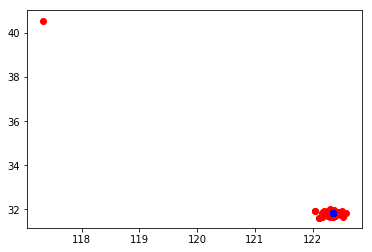

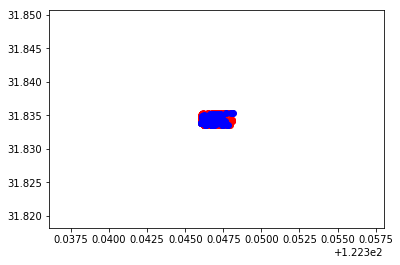

In [247]:
_e = 1 * 10e-6
lon_max = _part_shop.shop_longitude.max() + _e
lon_min = _part_shop.shop_longitude.min() - _e
lat_max = _part_shop.shop_latitude.max() + _e
lat_min = _part_shop.shop_latitude.min() - _e
print lon_max,lon_min,lat_max,lat_min
reasonable_part_train = _part_train[(_part_train.longitude > lon_min) & (_part_train.longitude < lon_max) & (_part_train.latitude > lat_min) & (_part_train.latitude < lat_max)]
print "all shape",_part_train.shape
print "reasonable shape",reasonable_part_train.shape
plt.scatter(x=_part_train.longitude,y=_part_train.latitude,c="r")
plt.scatter(x=_part_shop.shop_longitude,y=_part_shop.shop_latitude,c="b")
plt.show()
plt.scatter(x=reasonable_part_train.longitude,y=reasonable_part_train.latitude,c="r")
plt.scatter(x=_part_shop.shop_longitude,y=_part_shop.shop_latitude,c="b")
plt.show()

In [251]:
from sklearn.cluster import MiniBatchKMeans

In [272]:
cluster.labels_.shape

(137,)

In [267]:
cluster = MiniBatchKMeans(n_clusters=15, max_iter=500).fit(_part_shop[["shop_longitude","shop_latitude"]].values)

In [276]:
cluster.predict(_part_train[["longitude","latitude"]].values)

array([ 3,  3,  4, ..., 13, 10, 14], dtype=int32)

In [284]:
from sklearn.decomposition import PCA
pca = PCA().fit(np.concatenate([_part_train[["longitude","latitude"]].values,_part_test[["longitude","latitude"]]]))
pca.transform(_part_train[["longitude","latitude"]].values)

array([[-0.00016058, -0.00025895],
       [-0.00018096, -0.00027028],
       [-0.00100089, -0.00021887],
       ..., 
       [-0.00113108, -0.00011033],
       [-0.00034439,  0.000161  ],
       [ 0.00015927, -0.00033485]])

AttributeError: 'PCA' object has no attribute 'predict'